In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 1. Data Loading

In [6]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target              # 0 = malignant, 1 = benign

# In medical problems, it’s common to treat the disease (malignant) as the positive class (1)
df['target'] = 1 - df['target']

In [7]:
df.columns, df.columns.shape

(Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension',
        'target'],
       dtype='object'),
 (31,))

In [8]:
df.index, df.index.shape

(RangeIndex(start=0, stop=569, step=1), (569,))

In [9]:
df.values, df.values.shape

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
         1.000e+00],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
         1.000e+00],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
         1.000e+00],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
         1.000e+00],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
         1.000e+00],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
         0.000e+00]]),
 (569, 31))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## 2. Data Cleaning
- Not much data cleaning needed since it is loaded from sklearn

In [12]:
print("Null values         : ", df.isnull().sum().sum())
print("Duplicate values    : ", df.duplicated().sum())
print("Target distribution : ", df['target'].value_counts())

Null values         :  0
Duplicate values    :  0
Target distribution :  target
0    357
1    212
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)

In [13]:
import os

os.makedirs("../outputs/eda", exist_ok=True)
os.makedirs("../outputs/results", exist_ok=True)

### A. Class Distribution Plot

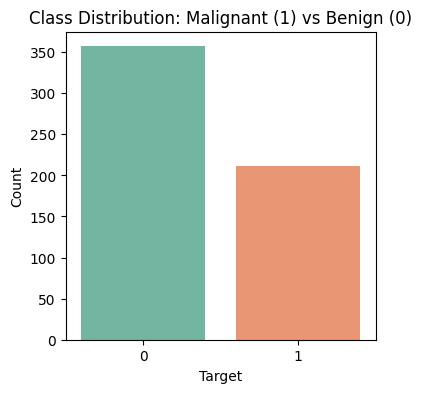

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Class Distribution: Malignant (1) vs Benign (0)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.savefig("../outputs/eda/class_distribution.png")
plt.show()

### B. Correlation Heatmap

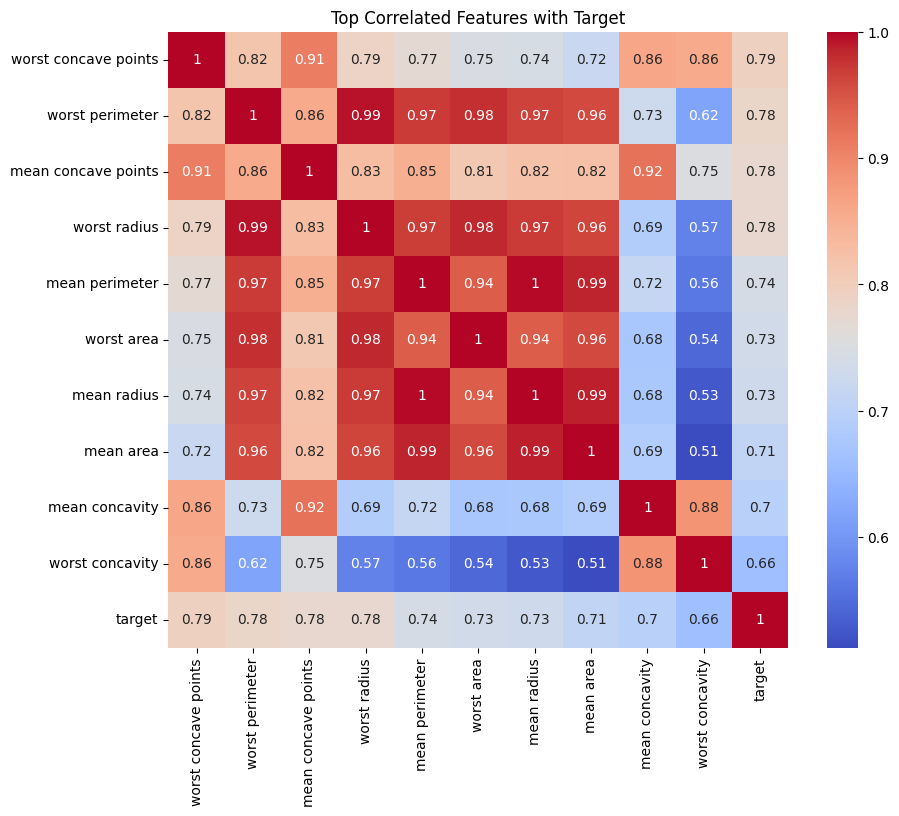

In [15]:
corr = df.corr()['target'].drop('target').sort_values(ascending=False)

top_features = corr.abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features.tolist() + ['target']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with Target")
plt.savefig("../outputs/eda/top_feature_correlation.png")
plt.show()

### C. Boxplots of Top Features by Target

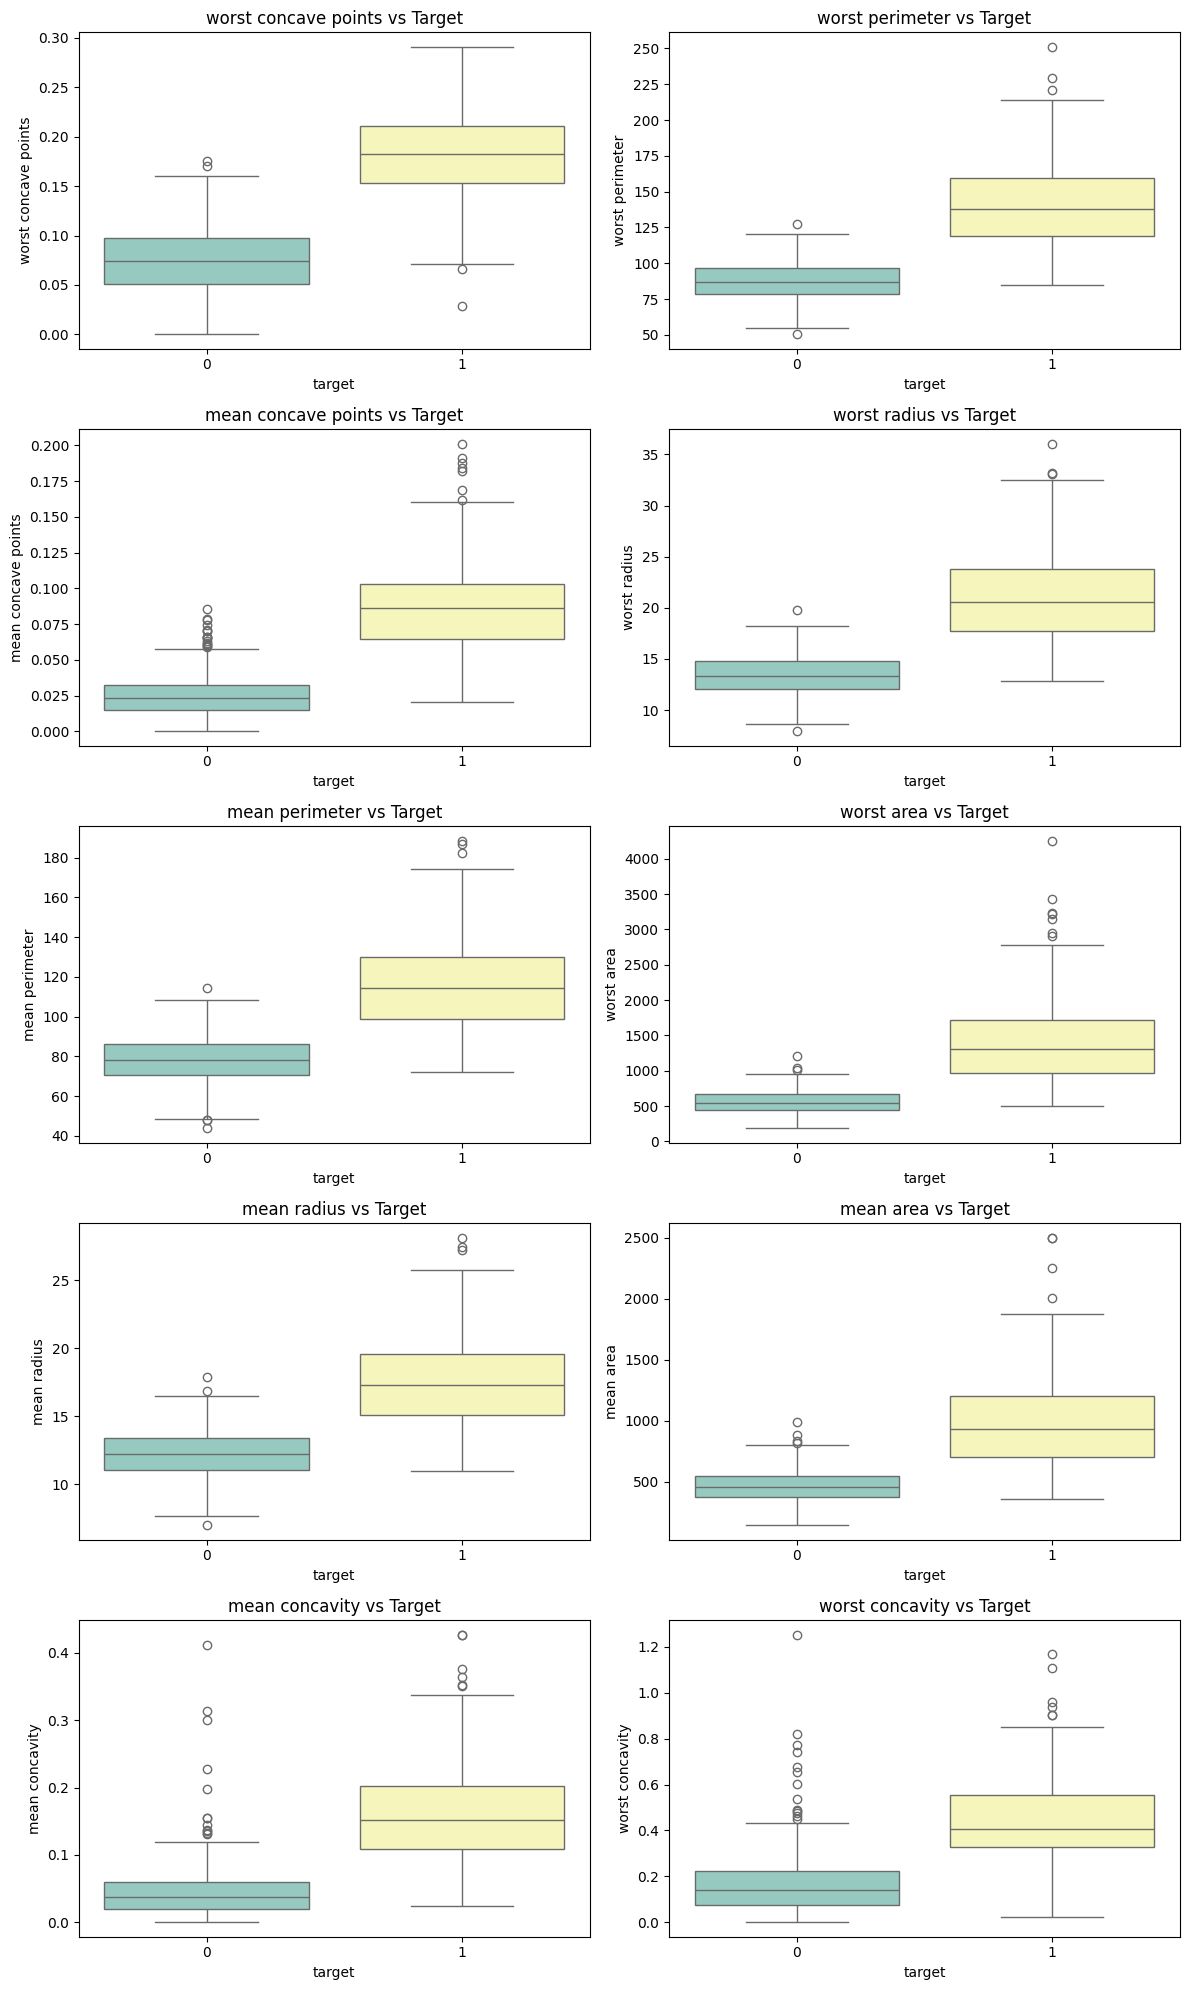

In [16]:
n = len(top_features)
rows = int(np.ceil(n / 2))
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, rows * 4))

axes = axes.flatten()

for i in range(n):
    sns.boxplot(data=df, x='target', y=top_features[i], palette='Set3', ax=axes[i])
    axes[i].set_title(f"{top_features[i]} vs Target")

plt.tight_layout()
plt.savefig("../outputs/eda/all_boxplots.png")
plt.show()

## 4. Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set shape  :", X_train.shape)
print("Test set shape      :", X_test.shape, end='\n\n')
print("Class distribution in training set:\n", y_train.value_counts(normalize=True), end='\n\n')
print("Class distribution in test set:\n", y_test.value_counts(normalize=True))

Training set shape  : (455, 30)
Test set shape      : (114, 30)

Class distribution in training set:
 target
0    0.626374
1    0.373626
Name: proportion, dtype: float64

Class distribution in test set:
 target
0    0.631579
1    0.368421
Name: proportion, dtype: float64


## 5. Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Model Building

In [19]:
from sklearn.linear_model import LogisticRegression
import joblib

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
print(coefficients.sort_values(ascending=False))

joblib.dump(log_reg, '../outputs/log_reg_model.pkl')

worst texture              1.423806
radius error               1.243632
worst symmetry             1.059102
mean concave points        0.954814
area error                 0.933406
worst area                 0.924092
worst concavity            0.910627
worst radius               0.896585
mean concavity             0.790535
perimeter error            0.759178
worst perimeter            0.726072
worst concave points       0.697882
mean texture               0.483945
concave points error       0.468080
mean area                  0.448719
worst smoothness           0.426599
mean radius                0.350461
mean perimeter             0.344489
mean smoothness            0.341000
smoothness error           0.252020
worst fractal dimension    0.059075
mean fractal dimension    -0.068227
concavity error           -0.099174
mean symmetry             -0.165077
worst compactness         -0.167724
symmetry error            -0.321749
texture error             -0.407025
mean compactness          -0

['../outputs/log_reg_model.pkl']

## 7. Model Evaluation

In [20]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

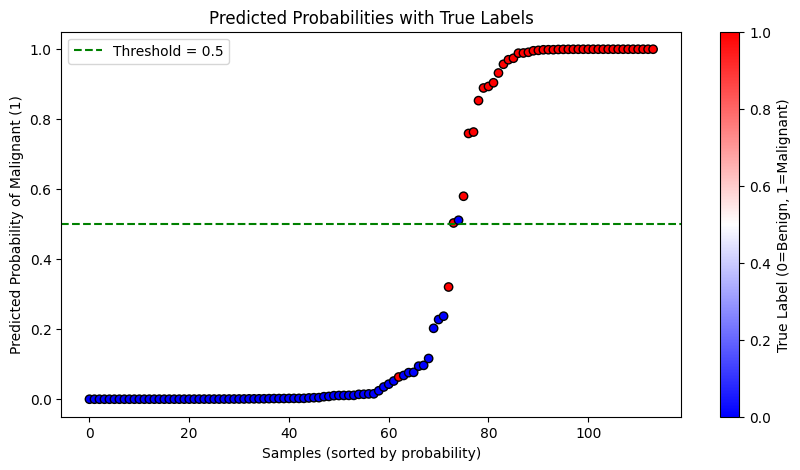

In [21]:
# Sort probabilities for better visualization
sorted_index = np.argsort(y_prob)
y_prob_sorted = y_prob[sorted_index]
y_test_sorted = y_test.values[sorted_index]  # if y_test is pandas Series

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_prob_sorted)), y_prob_sorted, 
            c=y_test_sorted, cmap='bwr', edgecolor='k')
plt.axhline(0.5, color='green', linestyle='--', label='Threshold = 0.5')
plt.xlabel('Samples (sorted by probability)')
plt.ylabel('Predicted Probability of Malignant (1)')
plt.title('Predicted Probabilities with True Labels')
plt.legend()
plt.colorbar(label="True Label (0=Benign, 1=Malignant)")
plt.savefig("../outputs/results/visual_threshold.png")
plt.show()

### A. Default Threshold

In [22]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy :: {accuracy_score(y_test, y_pred)}")
print(f"\nClassification report :: \n", classification_report(y_test, y_pred))

Accuracy :: 0.9736842105263158

Classification report :: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



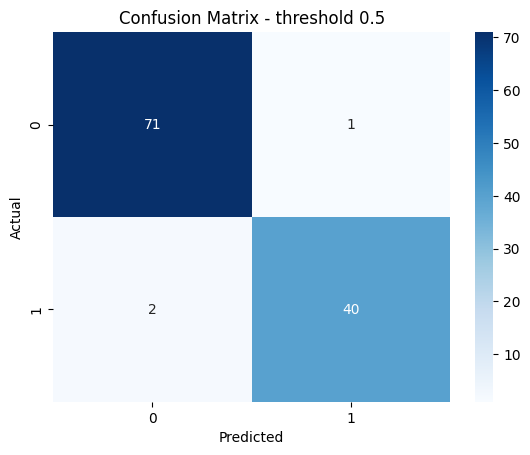

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - threshold 0.5')
plt.savefig("../outputs/results/default_threshold.png")
plt.show()

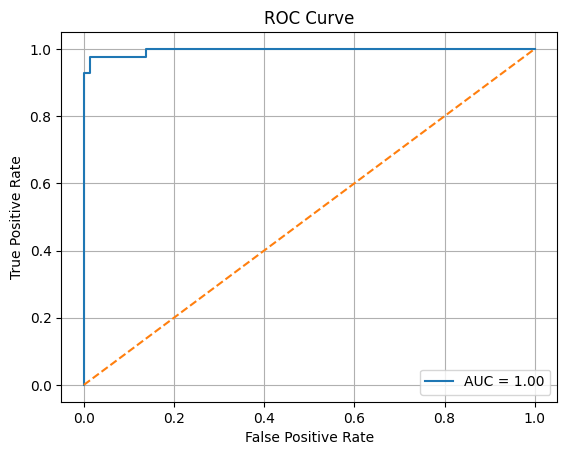

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

### B. Best Threshold 

In [25]:
thresholds = np.arange(0, 1.01, 0.01)

best_threshold = 0.5
best_accuracy = 0

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    acc = accuracy_score(y_test, y_pred_t)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t

y_pred_t = (y_prob >= best_threshold).astype(int)

print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)

Best Threshold: 0.24
Best Accuracy: 0.9824561403508771


In [26]:
print(f"Accuracy :: {accuracy_score(y_test, y_pred_t)}")
print(f"\nClassification report :: \n", classification_report(y_test, y_pred_t))

Accuracy :: 0.9824561403508771

Classification report :: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



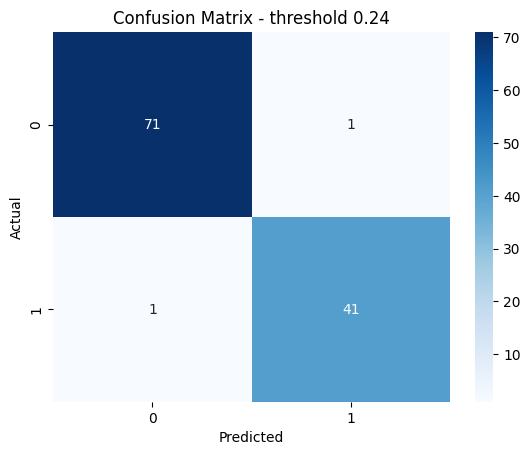

In [27]:
cm_t = confusion_matrix(y_test, y_pred_t)
sns.heatmap(cm_t, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - threshold {best_threshold}')
plt.savefig("../outputs/results/best_threshold.png")
plt.show()

### C. Critical Threshold
- This will give Recall = 1, ensuring no malignant case is missed.
(Though you might get more false positives, which is acceptable in life-critical scenarios.)

In [28]:
y_true = y_test

min_malignant_prob = np.min(y_prob[y_true == 1])
cric_threshold = round(min_malignant_prob, 3)
print("Threshold with FN=0 (Recall=1):", cric_threshold)

Threshold with FN=0 (Recall=1): 0.063


In [29]:
y_pred_t = (y_prob >= cric_threshold).astype(int)

print(f"Accuracy :: {accuracy_score(y_test, y_pred_t)}")
print(f"\nClassification report :: \n", classification_report(y_test, y_pred_t))

Accuracy :: 0.9122807017543859

Classification report :: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        72
           1       0.81      1.00      0.89        42

    accuracy                           0.91       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.91      0.91       114



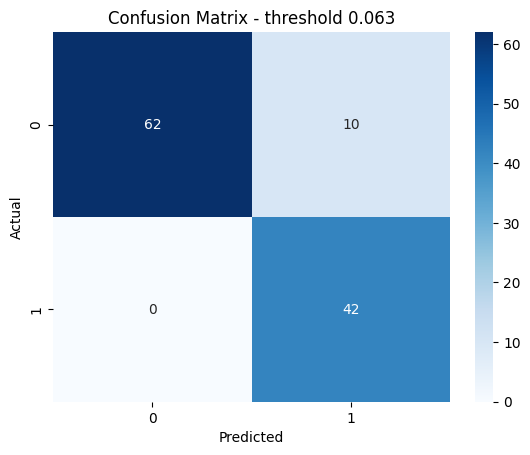

In [30]:
cm_c = confusion_matrix(y_test, y_pred_t)
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - threshold {cric_threshold}')
plt.savefig("../outputs/results/critical_threshold.png")
plt.show()